# Phase 1: Data Engineering & Visualization

## Objective
The goal of this notebook is to demonstrate the data engineering and visualization
steps required for 3D brain tumor segmentation using multi-modal MRI scans as
specified in Task 14.

## MRI Modalities
The BraTS dataset consists of four MRI modalities for each patient:
- T1: Structural anatomy
- T1ce: Contrast-enhanced tumor regions
- T2: Fluid and edema visibility
- FLAIR: Tumor and edema suppression of normal tissue

In this notebook, BraTS-style 3D data is simulated to demonstrate the pipeline,
as the actual dataset requires prior registration and large downloads.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Simulated multi-modal 3D MRI data
# Shape: (channels, height, width, depth)
# Channels: T1, T1ce, T2, FLAIR

mri_data = np.random.rand(4, 128, 128, 64)

# Simulated segmentation mask
segmentation_mask = np.random.randint(0, 4, size=(128, 128, 64))

print("MRI data shape:", mri_data.shape)
print("Segmentation mask shape:", segmentation_mask.shape)


MRI data shape: (4, 128, 128, 64)
Segmentation mask shape: (128, 128, 64)


## Multi-Modal MRI Visualization

Each MRI scan is a 3D volume. To understand the differences between modalities,
a single slice from the volume is visualized side-by-side for T1, T1ce, T2,
and FLAIR images along with the corresponding segmentation mask.

This step helps in visually validating tumor regions and understanding the
complementary information provided by each modality.


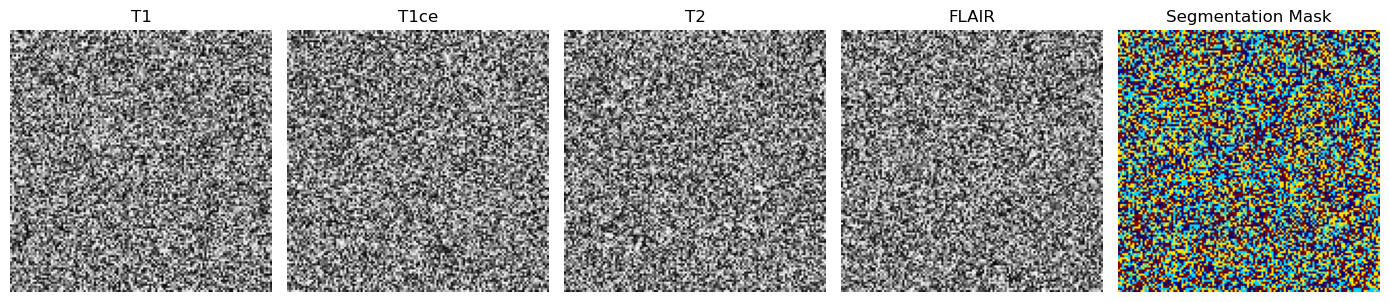

In [3]:
slice_index = 32  # middle slice

modalities = ["T1", "T1ce", "T2", "FLAIR"]

plt.figure(figsize=(14, 4))

for i in range(4):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mri_data[i, :, :, slice_index], cmap="gray")
    plt.title(modalities[i])
    plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(segmentation_mask[:, :, slice_index], cmap="jet")
plt.title("Segmentation Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


## Intensity Normalization

MRI intensity values vary across scans and modalities.
Z-score normalization is applied independently to each modality
to standardize the intensity distribution, which helps improve
model training stability.


In [4]:
# Z-score normalization per channel
normalized_mri = (
    mri_data - mri_data.mean(axis=(1, 2, 3), keepdims=True)
) / mri_data.std(axis=(1, 2, 3), keepdims=True)

print("Normalized MRI shape:", normalized_mri.shape)


Normalized MRI shape: (4, 128, 128, 64)
